# TEMPO Satellite Plots for July 1

On July 1st, the B200 completed three flights: one planned for an 15:00 UTC (08:00 PDT) takeoff, next planned for a 19:30 (12:30) takeoff, and the last planned for a 22:30 (15:30) takeoff. TEMPO data is currently available from 00:00-01:00 and 14:00-23:00 UTC on July 1, so all 3 flights' spirals have been mapped in TEMPO below.

## Setting Up Notebook

In [1]:
!pip install pyrsig

In [2]:
!pip install pycno

In [3]:
# Importing libraries
import xarray as xr
import pyrsig 
import pandas as pd
import pycno
import matplotlib.pyplot as plt
import math
import statistics as stat
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

In [4]:
# Limiting the size of displayed dataframes. Can be commented out for viewing whole dataframe
pd.set_option("display.max_rows", 10)
pd.set_option("display.max_columns", 8)

## July 1 Flight #1 TEMPO Data

Note: the B200 started its spiral at 16:36 UTC (09:36 PDT), peaked at 16:44 (09:44), and finished at 16:52 (09:52). The latitude and longitude of this spiral was approximately 32.8426° x -115.5128°. 

In [5]:
locname = 'b200_july_1_flight_1'
lat_coord= 32.8426
long_coord= -115.5128
bbox = (long_coord - 0.5, lat_coord - 0.5, long_coord + 0.5, lat_coord + 0.5) # Limiting region to area of spiral
bdate = '2024-07-01'

In [6]:
# Getting access to the Remote Sensing Information Gateway (RSIG) data's API

api = pyrsig.RsigApi(bdate=bdate, bbox=bbox, workdir=locname, gridfit=True)
api_key = 'anonymous'  # using public data, so using anonymous
api.tempo_kw['api_key'] = api_key

In [7]:
# after the cell runs, click on the table button.
# Then use filters to find tempo data products by names that start with tempo
# This enables you to see what data products are available
# NOTE: descdf.query('name.str.contains("tempo")') shows all tempo data products you can access //
# (good for plotting different variables than NO2)

descdf = api.descriptions()
descdf
descdf.query('name.str.contains("tempo.l2.no2")')

,name,label,description,bbox_str,beginPosition,timeResolution,endPosition,prefix
1309,tempo.l2.no2.solar_zenith_angle,l2.no2.solar_zenith_angle(deg),Solar zenith angle at pixel center.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo
1310,tempo.l2.no2.solar_azimuth_angle,l2.no2.solar_azimuth_angle(deg),Solar azimuth angle at pixel center.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo
1311,tempo.l2.no2.viewing_zenith_angle,l2.no2.viewing_zenith_angle(deg),Viewing zenith angle at pixel center.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo
1312,tempo.l2.no2.viewing_azimuth_angle,l2.no2.viewing_azimuth_angle(deg),Viewing azimuth angle at pixel center.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo
1313,tempo.l2.no2.relative_azimuth_angle,l2.no2.relative_azimuth_angle(deg),Relative azimuth angle at pixel center.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo
...,...,...,...,...,...,...,...,...
1331,tempo.l2.no2.amf_cloud_pressure,l2.no2.amf_cloud_pressure(-),Cloud pressure for AMF computation.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo
1332,tempo.l2.no2.amf_troposphere,l2.no2.amf_troposphere(-),Nitrogen dioxide tropospheric air mass factor.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo
1333,tempo.l2.no2.amf_stratosphere,l2.no2.amf_stratosphere(-),Nitrogen dioxide stratospheric air mass factor.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo
1334,tempo.l2.no2.fit_rms_residual,l2.no2.fit_rms_residual(-),Radiance fit RMS residual.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo


In [8]:
# Choosing to map TEMPO's vertical column NO2
tempokey = 'tempo.l2.no2.vertical_column_troposphere'

In [9]:
# Creating a data frame with time as the index
# xdr is used here for speed
df = api.to_dataframe(tempokey, backend='xdr')
df_time_index = df.set_index("Timestamp(UTC)")
df_time_index

Using cached: b200_july_1_flight_1/tempo.l2.no2.vertical_column_troposphere_2024-07-01T000000Z_2024-07-01T235959Z.xdr.gz


,LONGITUDE(deg),LATITUDE(deg),no2_vertical_column_troposphere(molecules/cm2),Longitude_SW(deg),...,Latitude_SW(deg),Latitude_SE(deg),Latitude_NW(deg),Latitude_NE(deg)
Timestamp(UTC),,,,,,,,,
2024-07-01T00:20:00+0000,-115.017937,32.982876,6.254182e+14,-114.991499,...,32.990350,32.993503,32.972275,32.975366
2024-07-01T00:20:00+0000,-115.078423,32.986034,6.954306e+14,-115.051237,...,32.993503,32.996214,32.975366,32.977996
2024-07-01T00:20:00+0000,-115.136581,32.988148,2.849206e+14,-115.110641,...,32.996214,32.998793,32.977996,32.980624
2024-07-01T00:20:00+0000,-115.196579,32.991226,7.925999e+14,-115.169712,...,32.998793,33.001541,32.980624,32.983422
2024-07-01T00:20:00+0000,-115.256065,32.993786,1.235206e+15,-115.229393,...,33.001541,33.004043,32.983422,32.985902
...,...,...,...,...,...,...,...,...,...
2024-07-01T23:40:00+0000,-115.887016,32.017582,2.329930e+14,-115.860765,...,32.025846,32.027643,32.008014,32.009909
2024-07-01T23:40:00+0000,-115.946625,32.020187,2.811203e+14,-115.919691,...,32.027643,32.030591,32.009909,32.013009
2024-07-01T23:40:00+0000,-115.655914,32.001045,7.144173e+14,-115.629673,...,32.009154,32.010259,31.991296,31.992491


In [10]:
# Do it again, but cleanup the keys and add time object
# Notice that the file is reused
df = api.to_dataframe(tempokey, unit_keys=False, parse_dates=True, backend='xdr')
df

Using cached: b200_july_1_flight_1/tempo.l2.no2.vertical_column_troposphere_2024-07-01T000000Z_2024-07-01T235959Z.xdr.gz


,Timestamp,LONGITUDE,LATITUDE,no2_vertical_column_troposphere,...,Latitude_SE,Latitude_NW,Latitude_NE,time
0,2024-07-01T00:20:00+0000,-115.017937,32.982876,6.254182e+14,...,32.993503,32.972275,32.975366,2024-07-01 00:20:00+00:00
1,2024-07-01T00:20:00+0000,-115.078423,32.986034,6.954306e+14,...,32.996214,32.975366,32.977996,2024-07-01 00:20:00+00:00
2,2024-07-01T00:20:00+0000,-115.136581,32.988148,2.849206e+14,...,32.998793,32.977996,32.980624,2024-07-01 00:20:00+00:00
3,2024-07-01T00:20:00+0000,-115.196579,32.991226,7.925999e+14,...,33.001541,32.980624,32.983422,2024-07-01 00:20:00+00:00
4,2024-07-01T00:20:00+0000,-115.256065,32.993786,1.235206e+15,...,33.004043,32.983422,32.985902,2024-07-01 00:20:00+00:00
...,...,...,...,...,...,...,...,...,...
928,2024-07-01T23:40:00+0000,-115.887016,32.017582,2.329930e+14,...,32.027643,32.008014,32.009909,2024-07-01 23:40:00+00:00
929,2024-07-01T23:40:00+0000,-115.946625,32.020187,2.811203e+14,...,32.030591,32.009909,32.013009,2024-07-01 23:40:00+00:00
930,2024-07-01T23:40:00+0000,-115.655914,32.001045,7.144173e+14,...,32.010259,31.991296,31.992491,2024-07-01 23:40:00+00:00
931,2024-07-01T23:40:00+0000,-115.712845,32.001564,1.180917e+15,...,32.009522,31.992491,31.991857,2024-07-01 23:40:00+00:00


In [11]:
# Making an hourly average since TEMPO returns hourly measurements
hdf = df.groupby(pd.Grouper(key='time', freq='1h')).mean(numeric_only=True)
hdf

,LONGITUDE,LATITUDE,no2_vertical_column_troposphere,Longitude_SW,...,Latitude_SW,Latitude_SE,Latitude_NW,Latitude_NE
time,,,,,,,,,
2024-07-01 00:00:00+00:00,-115.509253,32.509169,1.379057e+15,-115.482984,...,32.517188,32.519172,32.499150,32.501125
2024-07-01 01:00:00+00:00,-115.507620,32.505349,1.300386e+15,-115.481371,...,32.513375,32.515369,32.495333,32.497319
2024-07-01 02:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN
2024-07-01 03:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN
2024-07-01 04:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-07-01 19:00:00+00:00,-115.503351,32.497859,1.657412e+15,-115.477089,...,32.505880,32.507862,32.487856,32.489828
2024-07-01 20:00:00+00:00,-115.503692,32.500772,1.641014e+15,-115.477443,...,32.508819,32.510754,32.490793,32.492717
2024-07-01 21:00:00+00:00,-115.500977,32.502766,1.773502e+15,-115.474710,...,32.510784,32.512780,32.492760,32.494745


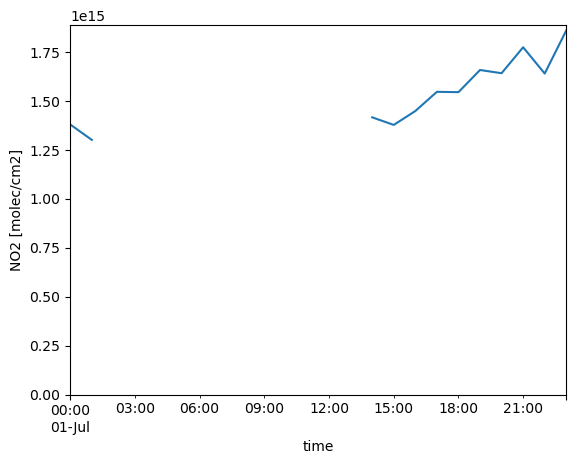

In [12]:
# Plot a data column selected from the names above
# This also allows us to visually see what times have data
tempocol = 'no2_vertical_column_troposphere'
ax = hdf[tempocol].plot(ylim=(0, None), ylabel='NO2 [molec/cm2]')

In [13]:
# Now retrieve a NetCDF file with IOAPI coordinates (like CMAQ)
# Might produce an error about the remote connection; rerunning the cell should fix it.
ds = api.to_ioapi(tempokey)
ds

Using cached: b200_july_1_flight_1/tempo.l2.no2.vertical_column_troposphere_2024-07-01T000000Z_2024-07-01T235959Z.nc.gz
Using cached: b200_july_1_flight_1/tempo.l2.no2.vertical_column_troposphere_2024-07-01T000000Z_2024-07-01T235959Z.nc


<xarray.Dataset> Size: 39kB
Dimensions:          (TSTEP: 24, VAR: 4, DATE-TIME: 2, LAY: 1, ROW: 9, COL: 11)
Coordinates:
  * TSTEP            (TSTEP) datetime64[ns] 192B 2024-07-01 ... 2024-07-01T23...
  * LAY              (LAY) float32 4B 0.9975
  * ROW              (ROW) float64 72B 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5
  * COL              (COL) float64 88B 0.5 1.5 2.5 3.5 4.5 ... 7.5 8.5 9.5 10.5
Dimensions without coordinates: VAR, DATE-TIME
Data variables:
    TFLAG            (TSTEP, VAR, DATE-TIME) int32 768B ...
    LONGITUDE        (TSTEP, LAY, ROW, COL) float32 10kB ...
    LATITUDE         (TSTEP, LAY, ROW, COL) float32 10kB ...
    COUNT            (TSTEP, LAY, ROW, COL) int32 10kB ...
    NO2_VERTICAL_CO  (TSTEP, LAY, ROW, COL) float32 10kB ...
Attributes: (12/34)
    IOAPI_VERSION:  1.0 1997349 (Dec. 15, 1997)
    EXEC_ID:        ????????????????                                         ...
    FTYPE:          1
    CDATE:          2024213
    CTIME:          2159
    WDATE:          2024213
    ...             ...
    GDNAM:          M_02_99BRACE    
    UPNAM:          XDRConvert      
    VAR-LIST:       LONGITUDE       LATITUDE        COUNT           NO2_VERTI...
    FILEDESC:       http://tempo.si.edu/,TEMPOSubset,XDRConvert              ...
    HISTORY:        XDRConvert
    crs_proj4:      +proj=lcc +lat_1=33.0 +lat_2=45.0 +lat_0=40.0 +lon_0=-97....

In [14]:
# Choose a column from above, notice that names are truncated, so they can be weird
tempoikey = 'NO2_VERTICAL_CO'

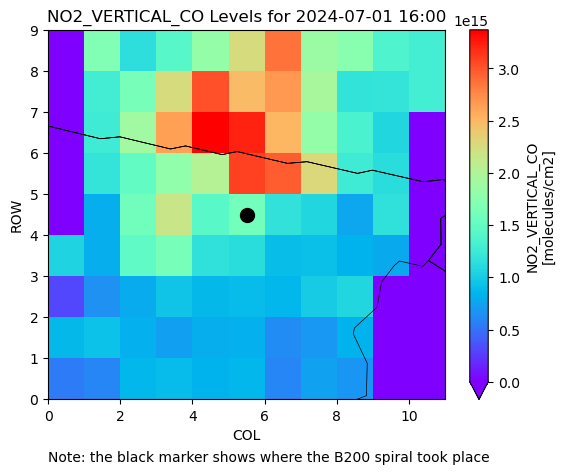

In [15]:
# Now plot a map using the pycno gridding package
# Documentation for the pycno package can be found in Dr. Hendrickson's GitHub
cno = pycno.cno(ds.crs_proj4)
time= 16 # Choose the UTC hour you'd like to plot
qm = ds[tempoikey].isel(TSTEP=time)

qm.plot(cmap='rainbow', vmin=0, vmax=qm.max().values) # Plotting with the desired colormap and handling missing values
cno.drawstates(resnum=1)

# Plotting a point on the graph using array indices
row_index = 4.5  # Center of the grid
col_index = 5.5  # Center of the grid
plt.scatter(col_index, row_index, color='black', s=100, zorder=5)  # Adjust the color, size (s), and zorder as needed

plt.title(f'{tempoikey} Levels for {bdate} {time}:00')
plt.text(0, -1.5, "Note: the black marker shows where the B200 spiral took place")
plt.show()

In [16]:
# Now that we've graphed where the spiral took place via rows and columns, we can pull the TEMPO data value
values= ds.NO2_VERTICAL_CO.isel(COL= math.floor(col_index), ROW= math.floor(row_index)).values

# Pulling the TEMPO satellite value at desired time for this spiral
tempo_val= float(values[time])
print(f'TEMPO satellite {tempoikey} value is {tempo_val: .2e} ({tempo_val}) molec/cm^2 for {bdate} {time}:00 UTC')

TEMPO satellite NO2_VERTICAL_CO value is  1.60e+15 (1600617004924928.0) molec/cm^2 for 2024-07-01 16:00 UTC


## July 1 Flight #1 Flight Data

In [17]:
# Pulling data that was preprocessed in Excel
# The first few columns (before the first unnamed column) show the raw flight data for the spiral
# The next group of columns includes averaged data based on altitude
# temp_avg and press_avg are in Kelvin and atm, respectively
# Directly after that (with no unnamed column separating it), the molec_coeff... columns show the process //
# of converting the airborne data from pptv to molec/cm^2
# The column total_no2 shows the summed total of NO2 molecules in the spiral column, aiding in comparison //
# with the TEMPO satellite data (which is in molec/cm^2)
main_df= pd.read_csv("/home/jovyan/Flight Data/7_1_f1_no2_data.csv")
main_df

,Time_Start,Time_Stop,Latitude_deg_THORNHILL,Longitude_deg_THORNHILL,...,total_no2,Unnamed: 20,Unnamed: 21,el centro elevation (ft)
0,59760,59761,32.819685,-115.565379,...,8.908120e+15,NaN,NaN,-47.225563
1,59761,59762,32.820863,-115.566050,...,NaN,NaN,NaN,NaN
2,59762,59763,32.820863,-115.566050,...,NaN,NaN,NaN,NaN
3,59763,59764,32.822015,-115.566781,...,NaN,NaN,NaN,NaN
4,59764,59765,32.822015,-115.566781,...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
956,60716,60717,32.800964,-115.470341,...,NaN,NaN,NaN,NaN
957,60717,60718,32.802123,-115.469414,...,NaN,NaN,NaN,NaN
958,60718,60719,32.802123,-115.469414,...,NaN,NaN,NaN,NaN
959,60719,60720,32.803423,-115.468796,...,NaN,NaN,NaN,NaN


In [18]:
# Pulling total_no2 value for comparative statistics
total_no2= main_df['total_no2'][0]
print(f'Flight data {tempoikey} value is {total_no2: .2e} ({total_no2}) molec/cm^2 for this spiral')

Flight data NO2_VERTICAL_CO value is  8.91e+15 (8908120000000000.0) molec/cm^2 for this spiral


## July 1 Flight #2 TEMPO Data

Note: the B200 started its spiral at 20:12 UTC (13:12 PDT), peaked at 20:20 (13:20), and finished at 20:24 (13:24). The latitude and longitude of this spiral was approximately 34.1012° x -117.2560°.  

In [19]:
locname = 'b200_july_1_flight_2'
lat_coord= 34.1012
long_coord= -117.2560
bbox = (long_coord - 0.5, lat_coord - 0.5, long_coord + 0.5, lat_coord + 0.5) # Limiting region to area of spiral
bdate = '2024-07-01'

In [20]:
# Getting access to the Remote Sensing Information Gateway (RSIG) data's API

api = pyrsig.RsigApi(bdate=bdate, bbox=bbox, workdir=locname, gridfit=True)
api_key = 'anonymous'  # using public data, so using anonymous
api.tempo_kw['api_key'] = api_key

In [21]:
# after the cell runs, click on the table button.
# Then use filters to find tempo data products by names that start with tempo
# This enables you to see what data products are available
# NOTE: descdf.query('name.str.contains("tempo")') shows all tempo data products you can access //
# (good for plotting different variables than NO2)

descdf = api.descriptions()
descdf
descdf.query('name.str.contains("tempo.l2.no2")')

,name,label,description,bbox_str,beginPosition,timeResolution,endPosition,prefix
1309,tempo.l2.no2.solar_zenith_angle,l2.no2.solar_zenith_angle(deg),Solar zenith angle at pixel center.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo
1310,tempo.l2.no2.solar_azimuth_angle,l2.no2.solar_azimuth_angle(deg),Solar azimuth angle at pixel center.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo
1311,tempo.l2.no2.viewing_zenith_angle,l2.no2.viewing_zenith_angle(deg),Viewing zenith angle at pixel center.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo
1312,tempo.l2.no2.viewing_azimuth_angle,l2.no2.viewing_azimuth_angle(deg),Viewing azimuth angle at pixel center.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo
1313,tempo.l2.no2.relative_azimuth_angle,l2.no2.relative_azimuth_angle(deg),Relative azimuth angle at pixel center.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo
...,...,...,...,...,...,...,...,...
1331,tempo.l2.no2.amf_cloud_pressure,l2.no2.amf_cloud_pressure(-),Cloud pressure for AMF computation.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo
1332,tempo.l2.no2.amf_troposphere,l2.no2.amf_troposphere(-),Nitrogen dioxide tropospheric air mass factor.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo
1333,tempo.l2.no2.amf_stratosphere,l2.no2.amf_stratosphere(-),Nitrogen dioxide stratospheric air mass factor.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo
1334,tempo.l2.no2.fit_rms_residual,l2.no2.fit_rms_residual(-),Radiance fit RMS residual.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo


In [22]:
# Choosing to map TEMPO's vertical column NO2
tempokey = 'tempo.l2.no2.vertical_column_troposphere'

In [23]:
# Creating a data frame with time as the index
# xdr is used here for speed
df = api.to_dataframe(tempokey, backend='xdr')
df_time_index = df.set_index("Timestamp(UTC)")
df_time_index

Using cached: b200_july_1_flight_2/tempo.l2.no2.vertical_column_troposphere_2024-07-01T000000Z_2024-07-01T235959Z.xdr.gz


,LONGITUDE(deg),LATITUDE(deg),no2_vertical_column_troposphere(molecules/cm2),Longitude_SW(deg),...,Latitude_SW(deg),Latitude_SE(deg),Latitude_NW(deg),Latitude_NE(deg)
Timestamp(UTC),,,,,,,,,
2024-07-01T00:20:00+0000,-115.014771,33.993099,8.247491e+14,-114.988085,...,34.001045,34.002912,33.982634,33.983428
2024-07-01T00:20:00+0000,-115.073410,33.993500,6.322374e+14,-115.047707,...,34.002912,34.004073,33.983428,33.984584
2024-07-01T00:20:00+0000,-115.132149,33.994751,4.911457e+14,-115.106728,...,34.004073,34.006313,33.984584,33.988108
2024-07-01T00:20:00+0000,-115.194527,33.999111,4.947410e+14,-115.166750,...,34.006313,34.009740,33.988108,33.991618
2024-07-01T00:20:00+0000,-115.008179,33.974525,3.715490e+14,-114.981651,...,33.982634,33.983428,33.964116,33.964281
...,...,...,...,...,...,...,...,...,...
2024-07-01T23:40:00+0000,-115.709457,33.000629,1.937110e+15,-115.682642,...,33.008730,33.010753,32.990453,32.992453
2024-07-01T23:40:00+0000,-115.767921,33.002525,1.943172e+15,-115.741970,...,33.010753,33.013023,32.992453,32.994813
2024-07-01T23:40:00+0000,-115.827843,33.005280,1.795871e+15,-115.801117,...,33.013023,33.015700,32.994813,32.997490


In [24]:
# Do it again, but cleanup the keys and add time object
# Notice that the file is reused
df = api.to_dataframe(tempokey, unit_keys=False, parse_dates=True, backend='xdr')
df

Using cached: b200_july_1_flight_2/tempo.l2.no2.vertical_column_troposphere_2024-07-01T000000Z_2024-07-01T235959Z.xdr.gz


,Timestamp,LONGITUDE,LATITUDE,no2_vertical_column_troposphere,...,Latitude_SE,Latitude_NW,Latitude_NE,time
0,2024-07-01T00:20:00+0000,-115.014771,33.993099,8.247491e+14,...,34.002912,33.982634,33.983428,2024-07-01 00:20:00+00:00
1,2024-07-01T00:20:00+0000,-115.073410,33.993500,6.322374e+14,...,34.004073,33.983428,33.984584,2024-07-01 00:20:00+00:00
2,2024-07-01T00:20:00+0000,-115.132149,33.994751,4.911457e+14,...,34.006313,33.984584,33.988108,2024-07-01 00:20:00+00:00
3,2024-07-01T00:20:00+0000,-115.194527,33.999111,4.947410e+14,...,34.009740,33.988108,33.991618,2024-07-01 00:20:00+00:00
4,2024-07-01T00:20:00+0000,-115.008179,33.974525,3.715490e+14,...,33.983428,33.964116,33.964281,2024-07-01 00:20:00+00:00
...,...,...,...,...,...,...,...,...,...
912,2024-07-01T23:40:00+0000,-115.709457,33.000629,1.937110e+15,...,33.010753,32.990453,32.992453,2024-07-01 23:40:00+00:00
913,2024-07-01T23:40:00+0000,-115.767921,33.002525,1.943172e+15,...,33.013023,32.992453,32.994813,2024-07-01 23:40:00+00:00
914,2024-07-01T23:40:00+0000,-115.827843,33.005280,1.795871e+15,...,33.015700,32.994813,32.997490,2024-07-01 23:40:00+00:00
915,2024-07-01T23:40:00+0000,-115.887741,33.007919,1.813000e+15,...,33.018315,32.997490,33.000039,2024-07-01 23:40:00+00:00


In [25]:
# Making an hourly average since TEMPO returns hourly measurements
hdf = df.groupby(pd.Grouper(key='time', freq='1h')).mean(numeric_only=True)
hdf

,LONGITUDE,LATITUDE,no2_vertical_column_troposphere,Longitude_SW,...,Latitude_SW,Latitude_SE,Latitude_NW,Latitude_NE
time,,,,,,,,,
2024-07-01 00:00:00+00:00,-115.499462,33.488390,1.140199e+15,-115.472772,...,33.496286,33.498747,33.478039,33.480501
2024-07-01 01:00:00+00:00,-115.532505,33.509990,1.451049e+15,-115.505769,...,33.517891,33.520364,33.499634,33.502114
2024-07-01 02:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN
2024-07-01 03:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN
2024-07-01 04:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-07-01 19:00:00+00:00,-115.495858,33.499984,1.403868e+15,-115.469156,...,33.507874,33.510343,33.489627,33.492099
2024-07-01 20:00:00+00:00,-115.496587,33.499615,1.382802e+15,-115.469903,...,33.507546,33.509941,33.489302,33.491702
2024-07-01 21:00:00+00:00,-115.495876,33.499316,1.504750e+15,-115.469160,...,33.507213,33.509680,33.488962,33.491434


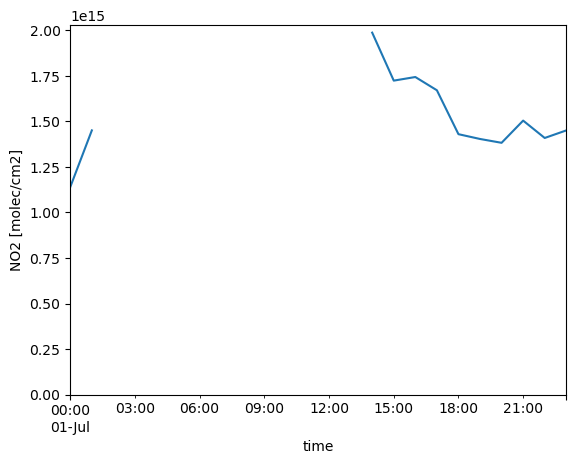

In [26]:
# Plot a data column selected from the names above
# This also allows us to visually see what times have data
tempocol = 'no2_vertical_column_troposphere'
ax = hdf[tempocol].plot(ylim=(0, None), ylabel='NO2 [molec/cm2]')

In [27]:
# Now retrieve a NetCDF file with IOAPI coordinates (like CMAQ)
# Might produce an error about the remote connection; rerunning the cell should fix it.
ds = api.to_ioapi(tempokey)
ds

Using cached: b200_july_1_flight_2/tempo.l2.no2.vertical_column_troposphere_2024-07-01T000000Z_2024-07-01T235959Z.nc.gz
Using cached: b200_july_1_flight_2/tempo.l2.no2.vertical_column_troposphere_2024-07-01T000000Z_2024-07-01T235959Z.nc


<xarray.Dataset> Size: 36kB
Dimensions:          (TSTEP: 24, VAR: 4, DATE-TIME: 2, LAY: 1, ROW: 9, COL: 10)
Coordinates:
  * TSTEP            (TSTEP) datetime64[ns] 192B 2024-07-01 ... 2024-07-01T23...
  * LAY              (LAY) float32 4B 0.9975
  * ROW              (ROW) float64 72B 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5
  * COL              (COL) float64 80B 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5
Dimensions without coordinates: VAR, DATE-TIME
Data variables:
    TFLAG            (TSTEP, VAR, DATE-TIME) int32 768B ...
    LONGITUDE        (TSTEP, LAY, ROW, COL) float32 9kB ...
    LATITUDE         (TSTEP, LAY, ROW, COL) float32 9kB ...
    COUNT            (TSTEP, LAY, ROW, COL) int32 9kB ...
    NO2_VERTICAL_CO  (TSTEP, LAY, ROW, COL) float32 9kB ...
Attributes: (12/34)
    IOAPI_VERSION:  1.0 1997349 (Dec. 15, 1997)
    EXEC_ID:        ????????????????                                         ...
    FTYPE:          1
    CDATE:          2024213
    CTIME:          2205
    WDATE:          2024213
    ...             ...
    GDNAM:          M_02_99BRACE    
    UPNAM:          XDRConvert      
    VAR-LIST:       LONGITUDE       LATITUDE        COUNT           NO2_VERTI...
    FILEDESC:       http://tempo.si.edu/,TEMPOSubset,XDRConvert              ...
    HISTORY:        XDRConvert
    crs_proj4:      +proj=lcc +lat_1=33.0 +lat_2=45.0 +lat_0=40.0 +lon_0=-97....

In [28]:
# Choose a column from above, notice that names are truncated, so they can be weird
tempoikey = 'NO2_VERTICAL_CO'

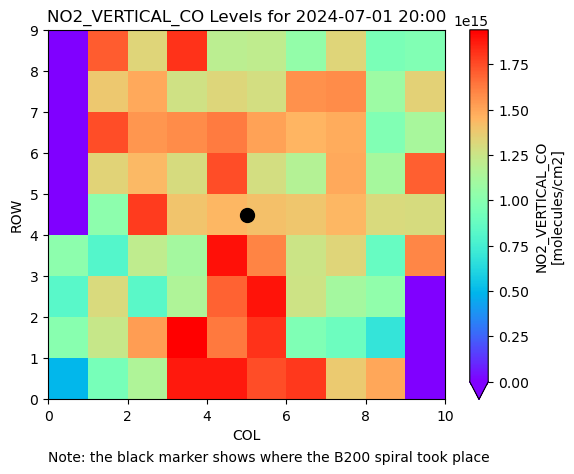

In [29]:
# Now plot a map using the pycno gridding package
# Documentation for the pycno package can be found in Dr. Hendrickson's GitHub
cno = pycno.cno(ds.crs_proj4)
time= 20 # Choose the UTC hour you'd like to plot
qm = ds[tempoikey].isel(TSTEP=time)

qm.plot(cmap='rainbow', vmin=0, vmax=qm.max().values) # Plotting with the desired colormap and handling missing values
cno.drawstates(resnum=1)

# Plotting a point on the graph using array indices
row_index = 4.5  # Center of the grid
col_index = 5  # Center of the grid
plt.scatter(col_index, row_index, color='black', s=100, zorder=5)  # Adjust the color, size (s), and zorder as needed

plt.title(f'{tempoikey} Levels for {bdate} {time}:00')
plt.text(0, -1.5, "Note: the black marker shows where the B200 spiral took place")
plt.show()

In [30]:
# Now that we've graphed where the spiral took place via rows and columns, we can pull the TEMPO data value
values= ds.NO2_VERTICAL_CO.isel(COL= math.floor(col_index), ROW= math.floor(row_index)).values

# Pulling the TEMPO satellite value at desired time for this spiral
tempo_val= float(values[time])
print(f'TEMPO satellite {tempoikey} value is {tempo_val: .2e} ({tempo_val}) molec/cm^2 for {bdate} {time}:00 UTC')

TEMPO satellite NO2_VERTICAL_CO value is  1.42e+15 (1417284715282432.0) molec/cm^2 for 2024-07-01 20:00 UTC


## July 1 Flight #2 Flight Data

In [31]:
# Pulling data that was preprocessed in Excel
# The first few columns (before the first unnamed column) show the raw flight data for the spiral
# The next group of columns includes averaged data based on altitude
# temp_avg and press_avg are in Kelvin and atm, respectively
# Directly after that (with no unnamed column separating it), the molec_coeff... columns show the process //
# of converting the airborne data from pptv to molec/cm^2
# The column total_no2 shows the summed total of NO2 molecules in the spiral column, aiding in comparison //
# with the TEMPO satellite data (which is in molec/cm^2)
main_df= pd.read_csv("/home/jovyan/Flight Data/7_1_f2_no2_data.csv")
main_df

,Time_Start,Time_Stop,Latitude_deg_THORNHILL,Longitude_deg_THORNHILL,...,total_no2,Unnamed: 20,Unnamed: 21,san bernadino elevation (ft)
0,72720,72721,34.089181,-117.355671,...,1.121250e+15,NaN,NaN,1995.203478
1,72721,72722,34.089238,-117.353642,...,NaN,NaN,NaN,NaN
2,72722,72723,34.089238,-117.353642,...,NaN,NaN,NaN,NaN
3,72723,72724,34.089287,-117.351608,...,NaN,NaN,NaN,NaN
4,72724,72725,34.089287,-117.351608,...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
716,73436,73437,34.099171,-117.227740,...,NaN,NaN,NaN,NaN
717,73437,73438,34.100702,-117.227669,...,NaN,NaN,NaN,NaN
718,73438,73439,34.100702,-117.227669,...,NaN,NaN,NaN,NaN
719,73439,73440,34.102236,-117.227947,...,NaN,NaN,NaN,NaN


In [32]:
# Pulling total_no2 value for comparative statistics
total_no2= main_df['total_no2'][0]
print(f'Flight data {tempoikey} value is {total_no2: .2e} ({total_no2}) molec/cm^2 for this spiral')

Flight data NO2_VERTICAL_CO value is  1.12e+15 (1121250000000000.0) molec/cm^2 for this spiral


## July 1 Flight #3 TEMPO Data

Note: the B200 started its spiral at 16:45 PDT (23:45 UTC), peaked at 16:54 (23:54), and finished at 17:00 (00:00 UTC July 2). The latitude and longitude of this spiral was approximately 33.8808° x -117.8078°.

In [33]:
locname = 'b200_july_1_flight_3'
lat_coord= 33.8808
long_coord= -117.8078
bbox = (long_coord - 0.5, lat_coord - 0.5, long_coord + 0.5, lat_coord + 0.5) # Limiting region to area of spiral
bdate = '2024-07-01'

In [34]:
# Getting access to the Remote Sensing Information Gateway (RSIG) data's API

api = pyrsig.RsigApi(bdate=bdate, bbox=bbox, workdir=locname, gridfit=True)
api_key = 'anonymous'  # using public data, so using anonymous
api.tempo_kw['api_key'] = api_key

In [35]:
# after the cell runs, click on the table button.
# Then use filters to find tempo data products by names that start with tempo
# This enables you to see what data products are available
# NOTE: descdf.query('name.str.contains("tempo")') shows all tempo data products you can access //
# (good for plotting different variables than NO2)

descdf = api.descriptions()
descdf
descdf.query('name.str.contains("tempo.l2.no2")')

,name,label,description,bbox_str,beginPosition,timeResolution,endPosition,prefix
1309,tempo.l2.no2.solar_zenith_angle,l2.no2.solar_zenith_angle(deg),Solar zenith angle at pixel center.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo
1310,tempo.l2.no2.solar_azimuth_angle,l2.no2.solar_azimuth_angle(deg),Solar azimuth angle at pixel center.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo
1311,tempo.l2.no2.viewing_zenith_angle,l2.no2.viewing_zenith_angle(deg),Viewing zenith angle at pixel center.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo
1312,tempo.l2.no2.viewing_azimuth_angle,l2.no2.viewing_azimuth_angle(deg),Viewing azimuth angle at pixel center.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo
1313,tempo.l2.no2.relative_azimuth_angle,l2.no2.relative_azimuth_angle(deg),Relative azimuth angle at pixel center.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo
...,...,...,...,...,...,...,...,...
1331,tempo.l2.no2.amf_cloud_pressure,l2.no2.amf_cloud_pressure(-),Cloud pressure for AMF computation.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo
1332,tempo.l2.no2.amf_troposphere,l2.no2.amf_troposphere(-),Nitrogen dioxide tropospheric air mass factor.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo
1333,tempo.l2.no2.amf_stratosphere,l2.no2.amf_stratosphere(-),Nitrogen dioxide stratospheric air mass factor.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo
1334,tempo.l2.no2.fit_rms_residual,l2.no2.fit_rms_residual(-),Radiance fit RMS residual.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo


In [36]:
# Choosing to map TEMPO's vertical column NO2
tempokey = 'tempo.l2.no2.vertical_column_troposphere'

In [37]:
# Creating a data frame with time as the index
# xdr is used here for speed
df = api.to_dataframe(tempokey, backend='xdr')
df_time_index = df.set_index("Timestamp(UTC)")
df_time_index

Using cached: b200_july_1_flight_3/tempo.l2.no2.vertical_column_troposphere_2024-07-01T000000Z_2024-07-01T235959Z.xdr.gz


,LONGITUDE(deg),LATITUDE(deg),no2_vertical_column_troposphere(molecules/cm2),Longitude_SW(deg),...,Latitude_SW(deg),Latitude_SE(deg),Latitude_NW(deg),Latitude_NE(deg)
Timestamp(UTC),,,,,,,,,
2024-07-01T00:20:00+0000,-117.042549,33.986408,4.084745e+15,-117.013937,...,33.992948,33.997453,33.974849,33.978981
2024-07-01T00:20:00+0000,-117.103973,33.989727,3.190230e+15,-117.076975,...,33.997453,34.001049,33.978981,33.982104
2024-07-01T00:20:00+0000,-117.167076,33.993153,4.491403e+15,-117.139486,...,34.001049,34.003984,33.982104,33.984776
2024-07-01T00:20:00+0000,-117.228683,33.996147,1.536153e+15,-117.201559,...,34.003984,34.006965,33.984776,33.987757
2024-07-01T00:20:00+0000,-117.291420,33.999737,3.255118e+15,-117.263407,...,34.006965,34.010793,33.987757,33.991761
...,...,...,...,...,...,...,...,...,...
2024-07-01T23:47:00+0000,-117.799202,33.015144,8.135897e+14,-117.772203,...,33.022953,33.025546,33.004691,33.007281
2024-07-01T23:47:00+0000,-117.859962,33.017681,7.397131e+14,-117.833122,...,33.025546,33.028460,33.007281,33.010191
2024-07-01T23:47:00+0000,-117.922760,33.020966,7.717267e+14,-117.894911,...,33.028460,33.031641,33.010191,33.013369


In [38]:
# Do it again, but cleanup the keys and add time object
# Notice that the file is reused
df = api.to_dataframe(tempokey, unit_keys=False, parse_dates=True, backend='xdr')
df

Using cached: b200_july_1_flight_3/tempo.l2.no2.vertical_column_troposphere_2024-07-01T000000Z_2024-07-01T235959Z.xdr.gz


,Timestamp,LONGITUDE,LATITUDE,no2_vertical_column_troposphere,...,Latitude_SE,Latitude_NW,Latitude_NE,time
0,2024-07-01T00:20:00+0000,-117.042549,33.986408,4.084745e+15,...,33.997453,33.974849,33.978981,2024-07-01 00:20:00+00:00
1,2024-07-01T00:20:00+0000,-117.103973,33.989727,3.190230e+15,...,34.001049,33.978981,33.982104,2024-07-01 00:20:00+00:00
2,2024-07-01T00:20:00+0000,-117.167076,33.993153,4.491403e+15,...,34.003984,33.982104,33.984776,2024-07-01 00:20:00+00:00
3,2024-07-01T00:20:00+0000,-117.228683,33.996147,1.536153e+15,...,34.006965,33.984776,33.987757,2024-07-01 00:20:00+00:00
4,2024-07-01T00:20:00+0000,-117.291420,33.999737,3.255118e+15,...,34.010793,33.987757,33.991761,2024-07-01 00:20:00+00:00
...,...,...,...,...,...,...,...,...,...
406,2024-07-01T23:47:00+0000,-117.799202,33.015144,8.135897e+14,...,33.025546,33.004691,33.007281,2024-07-01 23:47:00+00:00
407,2024-07-01T23:47:00+0000,-117.859962,33.017681,7.397131e+14,...,33.028460,33.007281,33.010191,2024-07-01 23:47:00+00:00
408,2024-07-01T23:47:00+0000,-117.922760,33.020966,7.717267e+14,...,33.031641,33.010191,33.013369,2024-07-01 23:47:00+00:00
409,2024-07-01T23:47:00+0000,-117.984169,33.024040,5.404998e+14,...,33.034564,33.013369,33.016288,2024-07-01 23:47:00+00:00


In [39]:
# Making an hourly average since TEMPO returns hourly measurements
hdf = df.groupby(pd.Grouper(key='time', freq='1h')).mean(numeric_only=True)
hdf

,LONGITUDE,LATITUDE,no2_vertical_column_troposphere,Longitude_SW,...,Latitude_SW,Latitude_SE,Latitude_NW,Latitude_NE
time,,,,,,,,,
2024-07-01 00:00:00+00:00,-117.502857,33.519064,1.861008e+15,-117.475506,...,33.526777,33.529712,33.508369,33.511305
2024-07-01 01:00:00+00:00,-117.500873,33.500904,2.821957e+15,-117.473586,...,33.508604,33.511584,33.490204,33.493183
2024-07-01 02:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN
2024-07-01 03:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN
2024-07-01 04:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-07-01 19:00:00+00:00,-117.495893,33.501822,2.439876e+15,-117.468561,...,33.509549,33.512457,33.491163,33.494068
2024-07-01 20:00:00+00:00,-117.493942,33.506008,2.328312e+15,-117.466587,...,33.513741,33.516637,33.495354,33.498247
2024-07-01 21:00:00+00:00,-117.498089,33.503433,2.266687e+15,-117.470795,...,33.511154,33.514092,33.492764,33.495697


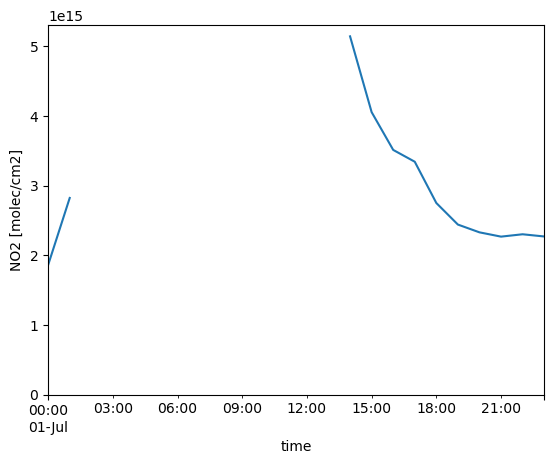

In [40]:
# Plot a data column selected from the names above
# This also allows us to visually see what times have data
tempocol = 'no2_vertical_column_troposphere'
ax = hdf[tempocol].plot(ylim=(0, None), ylabel='NO2 [molec/cm2]')

In [41]:
# Now retrieve a NetCDF file with IOAPI coordinates (like CMAQ)
# Might produce an error about the remote connection; rerunning the cell should fix it.
ds = api.to_ioapi(tempokey)
ds

Using cached: b200_july_1_flight_3/tempo.l2.no2.vertical_column_troposphere_2024-07-01T000000Z_2024-07-01T235959Z.nc.gz
Using cached: b200_july_1_flight_3/tempo.l2.no2.vertical_column_troposphere_2024-07-01T000000Z_2024-07-01T235959Z.nc


<xarray.Dataset> Size: 32kB
Dimensions:          (TSTEP: 24, VAR: 4, DATE-TIME: 2, LAY: 1, ROW: 8, COL: 10)
Coordinates:
  * TSTEP            (TSTEP) datetime64[ns] 192B 2024-07-01 ... 2024-07-01T23...
  * LAY              (LAY) float32 4B 0.9975
  * ROW              (ROW) float64 64B 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5
  * COL              (COL) float64 80B 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5
Dimensions without coordinates: VAR, DATE-TIME
Data variables:
    TFLAG            (TSTEP, VAR, DATE-TIME) int32 768B ...
    LONGITUDE        (TSTEP, LAY, ROW, COL) float32 8kB ...
    LATITUDE         (TSTEP, LAY, ROW, COL) float32 8kB ...
    COUNT            (TSTEP, LAY, ROW, COL) int32 8kB ...
    NO2_VERTICAL_CO  (TSTEP, LAY, ROW, COL) float32 8kB ...
Attributes: (12/34)
    IOAPI_VERSION:  1.0 1997349 (Dec. 15, 1997)
    EXEC_ID:        ????????????????                                         ...
    FTYPE:          1
    CDATE:          2024214
    CTIME:          117
    WDATE:          2024214
    ...             ...
    GDNAM:          M_02_99BRACE    
    UPNAM:          XDRConvert      
    VAR-LIST:       LONGITUDE       LATITUDE        COUNT           NO2_VERTI...
    FILEDESC:       http://tempo.si.edu/,TEMPOSubset,XDRConvert              ...
    HISTORY:        XDRConvert
    crs_proj4:      +proj=lcc +lat_1=33.0 +lat_2=45.0 +lat_0=40.0 +lon_0=-97....

In [42]:
# Choose a column from above, notice that names are truncated, so they can be weird
tempoikey = 'NO2_VERTICAL_CO'

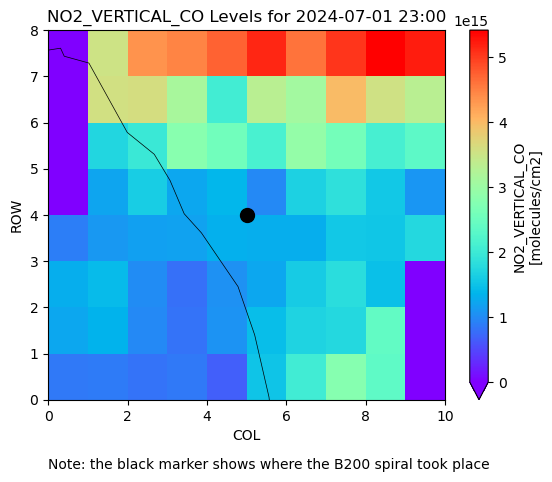

In [43]:
# Now plot a map using the pycno gridding package
# Documentation for the pycno package can be found in Dr. Hendrickson's GitHub
cno = pycno.cno(ds.crs_proj4)
time= 23 # Choose the UTC hour you'd like to plot
qm = ds[tempoikey].isel(TSTEP=time)

qm.plot(cmap='rainbow', vmin=0, vmax=qm.max().values) # Plotting with the desired colormap and handling missing values
cno.drawstates(resnum=1)

# Plotting a point on the graph using array indices
row_index = 4  # Center of the grid
col_index = 5  # Center of the grid
plt.scatter(col_index, row_index, color='black', s=100, zorder=5)  # Adjust the color, size (s), and zorder as needed

plt.title(f'{tempoikey} Levels for {bdate} {time}:00')
plt.text(0, -1.5, "Note: the black marker shows where the B200 spiral took place")
plt.show()

In [44]:
# Now that we've graphed where the spiral took place via rows and columns, we can pull the TEMPO data value
values= ds.NO2_VERTICAL_CO.isel(COL= math.floor(col_index), ROW= math.floor(row_index)).values

# Pulling the TEMPO satellite value at desired time for this spiral
tempo_val= float(values[time])
print(f'TEMPO satellite {tempoikey} value is {tempo_val: .2e} ({tempo_val}) molec/cm^2 for {bdate} {time}:00 UTC')

TEMPO satellite NO2_VERTICAL_CO value is  9.80e+14 (980449362968576.0) molec/cm^2 for 2024-07-01 23:00 UTC


## July 1 Flight #3 Flight Data

In [45]:
# Pulling data that was preprocessed in Excel
# The first few columns (before the first unnamed column) show the raw flight data for the spiral
# The next group of columns includes averaged data based on altitude
# temp_avg and press_avg are in Kelvin and atm, respectively
# Directly after that (with no unnamed column separating it), the molec_coeff... columns show the process //
# of converting the airborne data from pptv to molec/cm^2
# The column total_no2 shows the summed total of NO2 molecules in the spiral column, aiding in comparison //
# with the TEMPO satellite data (which is in molec/cm^2)
main_df= pd.read_csv("/home/jovyan/Flight Data/7_1_f3_no2_data.csv")
main_df

,Time_Start,Time_Stop,Latitude_deg_THORNHILL,Longitude_deg_THORNHILL,...,total_no2,Unnamed: 20,Unnamed: 21,ne anaheim elevation (ft)
0,85500,85501,33.891402,-117.796321,...,8.199060e+15,NaN,NaN,338.334447
1,85501,85502,33.890143,-117.795791,...,NaN,NaN,NaN,NaN
2,85502,85503,33.890143,-117.795791,...,NaN,NaN,NaN,NaN
3,85503,85504,33.888845,-117.795426,...,NaN,NaN,NaN,NaN
4,85504,85505,33.888845,-117.795426,...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
896,86396,86397,33.879194,-117.797428,...,NaN,NaN,NaN,NaN
897,86397,86398,33.878160,-117.798370,...,NaN,NaN,NaN,NaN
898,86398,86399,33.878160,-117.798370,...,NaN,NaN,NaN,NaN
899,86399,86400,33.877428,-117.799188,...,NaN,NaN,NaN,NaN


In [46]:
# Pulling total_no2 value for comparative statistics
total_no2= main_df['total_no2'][0]
print(f'Flight data {tempoikey} value is {total_no2: .2e}  ({total_no2}) molec/cm^2 for this spiral')

Flight data NO2_VERTICAL_CO value is  8.20e+15  (8199060000000000.0) molec/cm^2 for this spiral
